In [1]:
import numpy as np
import pandas as pd

import pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers

import random

import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.utils import shuffle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataload


In [3]:
with open("/content/drive/Shareddrives/투빅스_추천/1. 데이터/tag_embedding.pickle", 'rb') as f:
    X1 = pickle.load(f).reset_index(drop=True)['tag_embedding']

with open("/content/drive/Shareddrives/투빅스_추천/1. 데이터/mel_embedding.pickle", 'rb') as f:
    X2 = pickle.load(f).reset_index(drop=True)['mel_embedding']

X3 = pd.read_csv("/content/drive/Shareddrives/투빅스_추천/1. 데이터/genre.csv",index_col = 0)
X4 = pd.read_csv("/content/drive/Shareddrives/투빅스_추천/1. 데이터/singer.csv",index_col = 0)


In [22]:
def cos_sim(A, B):
  return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [23]:
index = [int(i) for i in range(len(X1))]

In [24]:
random.seed(20)
random.shuffle(index)

In [25]:
tag_embedding_1 = X1

tag_embedding_random = X1[index]
mel_embedding_random = X2[index]
genre_embedding_random = X3.reindex(index)
singer_embedding_random = X4.reindex(index)



In [26]:
tag_embedding_1

0         [-0.734712183, -1.25064841, -0.545722142, -0.7...
1         [-0.63112731, -1.35348631, -0.48800631, -0.432...
2         [-0.83757097, -1.35612154, -0.63135225, -0.643...
3         [-0.445414115, -1.08573319, -0.448559003, -0.5...
4         [-0.600866079, -1.61455595, -0.387368947, -0.9...
                                ...                        
605790    [-0.69558883, -1.2836982, -0.0435514, -0.77905...
605791    [-0.369413589, -1.44223102, -0.29699332, -0.86...
605792    [-0.681730427, -1.52054194, -0.58306618, -0.56...
605793    [-0.67500031, -1.6983043, -0.02440754, -0.8860...
605794    [-0.603918433, -0.610462546, 0.242329702, -0.4...
Name: tag_embedding, Length: 605795, dtype: object

In [27]:
tag_embedding_random

173911    [-0.48427425, -1.656764, -0.38725936, -0.69329...
133185    [-0.50499825, -1.78977041, -0.56324998, -0.540...
539826    [-0.62199938, -1.57157636, -0.55784711, -0.583...
57214     [-0.6936084, -1.71234262, -0.96646756, -0.7531...
32777     [-0.56037153, -1.31379796, -0.23913075, -0.516...
                                ...                        
600771    [-0.08104063, -1.78640521, -0.75506431, -0.888...
343331    [-0.61933456, -1.88240939, -0.27191341, -0.841...
106447    [-0.4673997, -0.5748142, -0.45422728, -0.48842...
272448    [-0.58877143, -1.98964381, -0.36970402, -0.816...
158550    [-0.51105434, -1.1213493, -0.3240514, -0.50959...
Name: tag_embedding, Length: 605795, dtype: object

In [32]:

sim = cos_sim(X1,tag_embedding_random)

In [33]:
n = len(X1)

In [34]:

X3_new = np.zeros((n,255))

for i in tqdm(range(n)):
  X3_new[i] = genre_embedding_random.iloc[i,:] #mel과 함께 움직인다..

100%|██████████| 605795/605795 [01:37<00:00, 6238.81it/s]


In [35]:
X1 = X1.values
X2 = mel_embedding_random.values
X3 = X3_new
X4 = singer_embedding_random.values
y = sim

In [41]:
y

array([ 8.41543903e-01,  9.07200746e-01,  7.29983547e-01,  8.03595819e-01,
        1.94045836e-01,  1.67787188e-01,  5.58798331e-01,  5.36352956e-01,
        4.66819852e-01,  6.56717048e-01,  8.39678760e-01,  9.60570813e-01,
       -2.22508846e-05,  9.34307447e-01,  1.26199668e-01,  4.74768886e-02,
        4.67095668e-01,  6.29255278e-01,  6.91066315e-01,  5.45772267e-01,
        8.45923112e-01,  9.25907460e-01,  7.08387715e-01,  4.54781586e-01,
        6.19814801e-01,  8.49027933e-01,  1.90763098e-02,  6.33576273e-01,
        8.36278670e-01,  9.04508049e-01,  1.87069120e-02,  9.41315764e-01,
        3.53012524e-01,  6.98362790e-01,  3.18669178e-01,  9.62680784e-01,
        6.87831654e-01,  3.09045015e-01,  6.75634191e-01,  8.44902765e-01,
        4.00583963e-02,  6.79108734e-02,  8.80988711e-01,  9.58228130e-01,
        5.31352225e-01,  7.41945847e-01,  4.50672117e-01,  6.64335473e-03,
        8.68430437e-01,  5.30108548e-01,  6.85453923e-01,  7.85873500e-01,
        3.91762304e-01,  

In [36]:

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=1)
X1_train, X1_val, y_train, y_val = train_test_split(X1_train, y_train, test_size=0.25, random_state=1)


X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)
X2_train, X2_val, y_train, y_val = train_test_split(X2_train, y_train, test_size=0.25, random_state=1)


X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=1)
X3_train, X3_val, y_train, y_val = train_test_split(X3_train, y_train, test_size=0.25, random_state=1)

X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=1)
X4_train, X4_val, y_train, y_val = train_test_split(X4_train, y_train, test_size=0.25, random_state=1)


ValueError: ignored

In [ ]:


initializer = keras.initializers.HeUniform(seed = 21)

dropout_rate = 0.2

mel_input = keras.Input(shape=(48,20,1), name="mel")


x2 = layers.Conv2D(32, 3, activation="relu")(mel_input)
x2 = layers.Conv2D(32, 3, activation="relu")(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)
x2 = layers.MaxPooling2D(2)(x2)

x2 = layers.Conv2D(64, 3, activation="relu", padding="same")(x2)
x2 = layers.Conv2D(64, 3, activation="relu", padding="same")(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)
x2 = layers.MaxPooling2D(2)(x2)

x2 = layers.Conv2D(128, 3, activation="relu", padding="same")(x2)
x2 = layers.Conv2D(128, 3, activation="relu", padding="same")(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)


x2 = layers.Reshape((-1,256))(x2)
x2 = layers.LSTM(64)(x2)


singer_input = keras.Input(shape=(1,),name='singer')
x4 = layers.Embedding(120358,4)(singer_input)
x4 = layers.Flatten()(x4)

gen_input = keras.Input(shape=(255,), name="gen")


x2 = tf.keras.layers.Concatenate()([gen_input, x2,x4])


x2 = layers.Dense(256, activation="relu",kernel_initializer=initializer)(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)
x2 = layers.Dense(128, activation="relu",kernel_initializer=initializer)(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)
x2 = layers.Dense(64, activation="relu",kernel_initializer=initializer)(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dropout(dropout_rate)(x2)
x2 = layers.Dense(32, activation="relu",kernel_initializer=initializer)(x2)
x2 = layers.BatchNormalization(trainable=True)(x2)
x2 = layers.Dense(16,kernel_initializer=initializer)(x2) 


tag_input = keras.Input(shape=(256,), name="tag")

x1 = layers.Dense(256, activation="relu",kernel_initializer=initializer)(tag_input)
x1 = layers.BatchNormalization(trainable=True)(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(128, activation="relu",kernel_initializer=initializer)(x1)
x1 = layers.BatchNormalization(trainable=True)(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(64, activation="relu",kernel_initializer=initializer)(x1)
x1 = layers.BatchNormalization(trainable=True)(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(32, activation="relu",kernel_initializer=initializer)(x1)
x1 = layers.BatchNormalization(trainable=True)(x1)

x1 = layers.Dense(16,kernel_initializer=initializer)(x1)



x3  = tf.keras.layers.Dot(axes=1,normalize=True)([x1, x2])



model = keras.Model(inputs=[tag_input,mel_input,gen_input,singer_input], outputs=x3, name="model")
model.summary()


In [37]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

NameError: ignored

In [38]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stoping_callback = EarlyStopping(monitor='val_loss',patience=5,
                                      restore_best_weights=True)


from keras.utils import multi_gpu_utils


optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
with tf.device('/gpu:0'):
    model.compile(optimizer=optimizer,
                  loss= tf.keras.losses.MeanSquaredError()   , #tf.keras.losses.MeanSquaredError()   contrastive_loss
                  metrics=[tf.keras.metrics.MeanSquaredError()]) #


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


NameError: ignored

In [39]:
BATCH_SIZE = 256
EPOCHS = 20



result = model.fit([X1_train,X2_train,X3_train,X4_train] ,y_train, epochs=EPOCHS, 
                   validation_data = ([X1_val,X2_val,X3_val,X4_val] ,y_val), batch_size=BATCH_SIZE,
                  callbacks=[early_stoping_callback]) #


NameError: ignored

In [ ]:
model.save("my_singer_h5_model.h5")

In [ ]:
y_pred = model.predict(x = (X1_val,X2_val,X3_val,X4_val))

In [ ]:
y_pred.reshape(-1)

array([0.9206088 , 0.8810209 , 0.88906   , ..., 0.7703752 , 0.8665365 ,
       0.83042705], dtype=float32)

In [ ]:
from sklearn.metrics import ndcg_score

ndcg_score(np.asarray([y_val]),np.array(y_pred).T)

0.9946635693622689

model.save("kaist.

In [ ]:
from scipy import stats

tau, p_value = stats.kendalltau(y_val, y_pred)

print(tau, p_value)

0.4075997952577184 0.0


In [ ]:
graph_data = pd.DataFrame({ "y_true" : np.asarray(y_val), "y_pred" : y_pred.reshape(-1)})

graph_data['diff'] = abs(graph_data['y_true'] - graph_data['y_pred'])

In [ ]:
graph_data.sort_values(by=['y_pred']).reset_index(drop=True)

,y_true,y_pred,diff
0,0.440242,0.437242,0.003000
1,0.448546,0.461026,0.012480
2,0.455139,0.470450,0.015311
3,0.536094,0.474533,0.061561
4,0.873262,0.480385,0.392877
...,...,...,...
19995,0.739309,0.968892,0.229583
19996,0.985017,0.968973,0.016044
19997,0.898317,0.970443,0.072126
19998,0.976781,0.971632,0.005149


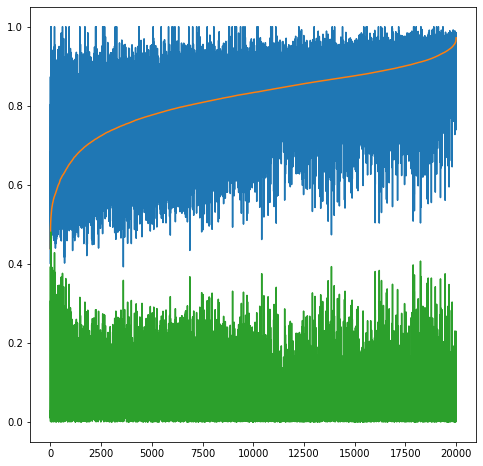

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(graph_data.sort_values(by=['y_pred']).reset_index(drop=True))
plt.show()